# simple linear regression

In [2]:
# step 1 stop warning of error messages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100)

In [3]:
#step 2 importing data file from local host
mba_salary_df=pd.read_csv('MBA Salary.csv')
mba_salary_df.head(10)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [4]:
#step 3 information of data
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [6]:
# step 5  imprting stats model
import statsmodels.api as sm
#step 6 X is defined ad independent variable(feature)
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [9]:
#step 7 Y is defined as dependent variable(target variable)
Y=mba_salary_df['Salary']

In [10]:
# STEP8 importing library SKLEARN 
from sklearn.model_selection import train_test_split

In [12]:
# step 9 splitting dataset into train and test set
train_X,test_X, train_y,test_y = train_test_split(X,Y,
train_size=0.8,random_state=100)

In [13]:
#step 10 fitting linear model equation
mba_salary_lm=sm.OLS(train_y,train_X).fit()

In [14]:
#step 11 printing result of linear regression model
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [15]:
#step 12 summary results of all the stat of linear regression
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2021-12-07 20:35      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [16]:
# step 12 importing libraries for plotting the  data
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline












<Figure size 576x432 with 0 Axes>

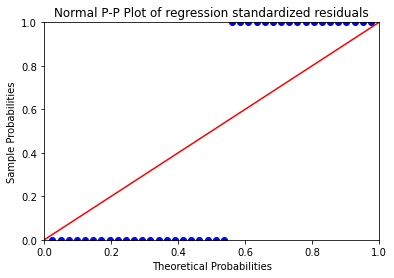

In [17]:
# step 13 normal  PP plot
mba_salary_resid=mba_salary_lm.resid
probplot=sm.ProbPlot(mba_salary_resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P Plot of regression standardized residuals")
plt.show()

Text(0, 0.5, 'Standardized Residuals')

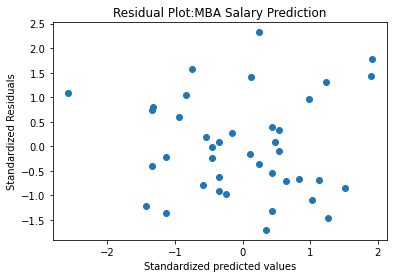

In [20]:
# step 14 homoscedasticity
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter( get_standardized_values(mba_salary_lm.fittedvalues),
get_standardized_values(mba_salary_resid ) )
plt.title("Residual Plot:MBA Salary Prediction")
plt.xlabel("Standardized predicted values")
plt.ylabel("Standardized Residuals")

In [21]:
#step 15 outliers detection using zscore
from scipy.stats import zscore

In [22]:
mba_salary_df['z_score_salary']=zscore(mba_salary_df.Salary)

In [24]:
mba_salary_df[(mba_salary_df.z_score_salary > 3.0 )|(mba_salary_df.z_score_salary < -3.0)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


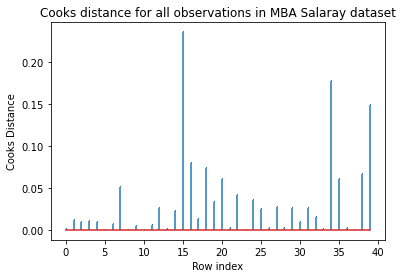

In [25]:
# Step 16    Outlier Detection using cook distance #
import numpy as np
mba_influence = mba_salary_lm.get_influence() 
(c, p) = mba_influence.cooks_distance 
plt.stem( np.arange( len(train_X) ), 
np.round( c, 3), 
markerfmt=","); 
plt.title("Cooks distance for all observations in MBA Salaray dataset"); 
plt.xlabel("Row index") 
plt.ylabel("Cooks Distance");


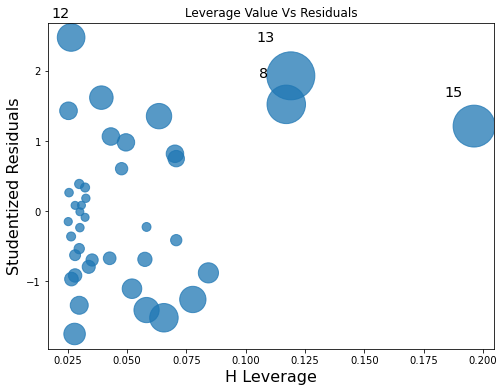

In [26]:
# Step 16    Outlier Detection using Leverage #
from statsmodels.graphics.regressionplots import influence_plot 
fig, ax = plt.subplots( figsize=(8,6)) 
influence_plot(mba_salary_lm, ax = ax) 
plt.title("Leverage Value Vs Residuals") 
plt.show();


In [27]:
# STEP 17 predicting on validation set
pred_y = mba_salary_lm.predict(test_X)

In [29]:
# STEP 18 strength of relation ship using R square and error
# finding R - square and RMSE
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
np.abs(r2_score(test_y,pred_y))

0.15664584974230378

In [31]:
import numpy as np

# finding root mean square error
np.sqrt(mean_squared_error(test_y,pred_y))

73458.04348346894

In [32]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
# Predict the y values
pred_y = mba_salary_lm.predict(test_X ) 
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm, 
test_X,alpha = 0.1) 
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'], 
'pred_y': pred_y, 
'pred_y_left': pred_y_low, 
'pred_y_right': pred_y_high })


In [33]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182
